# CIFAR-100 Classification Project

This project aims to build and compare different deep learning models for classifying images from the **CIFAR-100 dataset**. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

The **CIFAR-100 dataset** consists of:

* **50,000 training images** and **10,000 testing images**
* Image size: **32 × 32 pixels**, **3 color channels (RGB)**
* **100 distinct object categories**, each representing fine-grained classes such as “apple,” “clock,” “rocket,” etc.

---

## **Project Agenda & Steps**

1. **Dataset Setup**

   * Import necessary libraries.
   * Load the CIFAR-100 dataset.
   * Preprocess the data: normalize pixel values, reshape images where necessary, and one-hot encode labels.
   * Verify the shapes of the processed data.

2. **Model Building**

   * Define the architecture for each model:

     * **Basic ANN Model**
     * **Basic CNN Model**
     * **Deeper CNN Model**

3. **Model Training**

   * Train each model using the prepared training data.
   * Implement **Early Stopping** and **Model Checkpointing** to optimize training and save the best model weights.

4. **Model Evaluation**

   * Load the best weights for each trained model.
   * Evaluate performance on the test set using metrics like loss and accuracy.
   * Visualize training history (accuracy and loss curves) to compare models.
   * Generate and visualize confusion matrices to analyze classification performance across 100 classes.

5. **Prediction Analysis**

   * Use the best performing model (expected to be the **Deeper CNN**) to make predictions on the test set.
   * Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

---

## **Goal**

To analyze and demonstrate how **model complexity influences classification accuracy and efficiency** on the **CIFAR-100 dataset**, which is significantly more challenging than Fashion-MNIST due to its **color images, higher dimensionality, and large number of categories (100 classes)**.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

In [45]:
import io
import keras
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix, classification_report

#### 1.2) Load Dataset

Load the **Cifar100** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [2]:
(train_images,train_labels), (test_images,test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:",train_images.shape)
print("CIFAR-100 Testing images shape:",test_images.shape)
print("CIFAR-100 Training labels shape:",train_labels.shape)
print("CIFAR-100 Testing labels shape:",test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 140s 1us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### **1.4) One-Hot Encode Labels**

CIFAR-100 has **100 classes**, so each label (0–99) needs to be converted into a **one-hot encoded vector of length 100** for multi-class classification.

**Example:**

* Original label: `42`
* One-hot encoded: `[0, 0, …, 0, 1, 0, …, 0]` → length 100, with `1` at index 42

This transformation is required because neural networks output **probabilities for each class**, and one-hot encoding allows us to compute the **categorical cross-entropy loss** properly.

In [4]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=100)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=100)

#### 1.5) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output for CIFAR-100:**

* Training images shape: `(50000, 32, 32, 3)`
* Testing images shape: `(10000, 32, 32, 3)`
* Training labels shape: `(50000, 100)`
* Testing labels shape: `(10000, 100)`



In [5]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


### 2. Model Building

#### 2.1) Basic ANN Model


* Flatten (32×32×3 → 3,072) → 0 params
* Dense (512, ReLU) → 1,572,736 params
* Dense (256, ReLU) → 131,328 params
* Dense (100, Softmax) → 25,700 params
**Total params: \~1.73M**

In [6]:
# Define ANN model for CIFAR-100
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),   # CIFAR-100 images
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(100, activation='softmax')    # 100 classes
])

# Compile the model
ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,730,404 (6.60 MB)

 Trainable params: 1,730,404 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model

* **Conv2D** (32, 3×3) + MaxPool → 896 params
* **Conv2D** (64, 3×3) + MaxPool → 18,496 params
* **Flatten**
* **Dense** (256, ReLU) → 1,310,464 params
* **Dense** (100, Softmax) → 25,700 params

**Total params**: \~1.36M


In [7]:
# Define Basic CNN model for CIFAR-100
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

# Compile the model
basic_cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,172 (2.42 MB)

 Trainable params: 635,172 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

* **Conv2D** (32, 3×3) + BN + MaxPool + Dropout → 896 + 64 params
* **Conv2D** (64, 3×3) + BN + MaxPool + Dropout → 18,496 + 128 params
* **Conv2D** (128, 3×3) + BN + MaxPool + Dropout → 73,856 + 256 params
* **Flatten**
* **Dense** (512, ReLU) + BN + Dropout → 1,310,464 + 512 params
* **Dense** (100, Softmax) → 51,300 params

**Total params:** \~1.46M


In [8]:
# Define Deeper CNN model for CIFAR-100
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax')
])

# Compile the model
deeper_cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
deeper_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 410,148 (1.56 MB)

 Trainable params: 408,676 (1.56 MB)

 Non-trainable params: 1,472 (5.75 KB)

### 3. Train models

#### 3.1) Training ANN Model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 128  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [9]:
# Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='/content/best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

# Train ANN model
print("Training ANN model on CIFAR-100...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=128,  # slightly larger batch for CIFAR-100
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)

print("ANN model training finished.")

Training ANN model on CIFAR-100...
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0505 - loss: 4.3468
Epoch 1: val_loss improved from inf to 3.82868, saving model to /content/best_ann_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0506 - loss: 4.3462 - val_accuracy: 0.1170 - val_loss: 3.8287
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1340 - loss: 3.7218
Epoch 2: val_loss improved from 3.82868 to 3.64602, saving model to /content/best_ann_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1340 - loss: 3.7217 - val_accuracy: 0.1453 - val_loss: 3.6460
Epoch 3/30
388/391 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1680 - loss: 3.5371
Epoch 3: val_loss improved from 3.64602 to 3.52315, saving model to /content/best_ann_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1680 - loss: 3.5369 - val_accuracy: 0.1761 - val_loss: 3.5231
Epoch 4/30
390/391 ━━━━━━━

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 128
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [10]:
# ModelCheckpoint callback for Basic CNN
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='/content/best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

# Train Basic CNN model
print("Training Basic CNN model on CIFAR-100...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=128,  # slightly larger batch for CIFAR-100
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)

print("Basic CNN model training finished.")

Training Basic CNN model on CIFAR-100...
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0790 - loss: 4.1267
Epoch 1: val_loss improved from inf to 3.31052, saving model to /content/best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.0792 - loss: 4.1258 - val_accuracy: 0.2071 - val_loss: 3.3105
Epoch 2/30
382/391 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2425 - loss: 3.1268
Epoch 2: val_loss improved from 3.31052 to 2.94571, saving model to /content/best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2430 - loss: 3.1246 - val_accuracy: 0.2818 - val_loss: 2.9457
Epoch 3/30
383/391 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3160 - loss: 2.7437
Epoch 3: val_loss improved from 2.94571 to 2.75869, saving model to /content/best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3162 - loss: 2.7432 - val_accuracy: 0.3158 - val_loss: 2.7587
Ep

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 128  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [11]:
# ModelCheckpoint callback for Deeper CNN
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='/content/best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

# Train Deeper CNN model
print("Training Deeper CNN model on CIFAR-100...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=128,  # slightly larger batch for CIFAR-100
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)

print("Deeper CNN model training finished.")

Training Deeper CNN model on CIFAR-100...
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0669 - loss: 4.7713
Epoch 1: val_loss improved from inf to 4.79932, saving model to /content/best_deeper_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.0670 - loss: 4.7701 - val_accuracy: 0.0442 - val_loss: 4.7993
Epoch 2/30
388/391 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1658 - loss: 3.5706
Epoch 2: val_loss improved from 4.79932 to 3.12591, saving model to /content/best_deeper_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.1659 - loss: 3.5697 - val_accuracy: 0.2354 - val_loss: 3.1259
Epoch 3/30
388/391 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2315 - loss: 3.1743
Epoch 3: val_loss improved from 3.12591 to 2.96191, saving model to /content/best_deeper_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2316 - loss: 3.1737 - val_accuracy: 0.2731 - val_loss: 2.9

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

/tmp/ipython-input-203431923.py:33: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


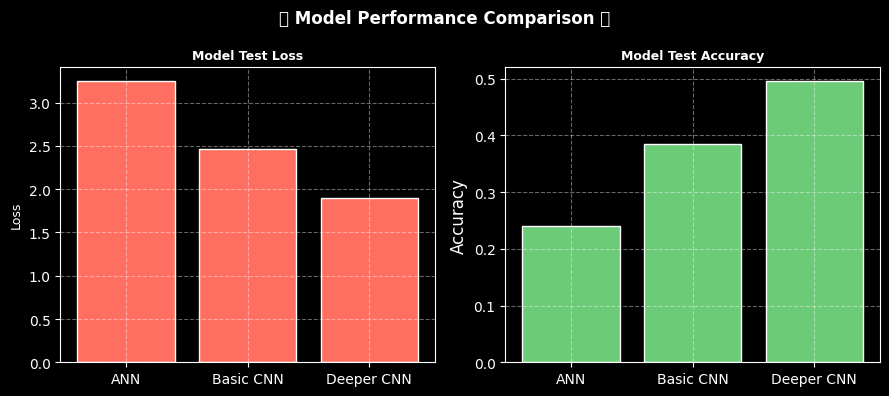

In [12]:
ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=9, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=9)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=9, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


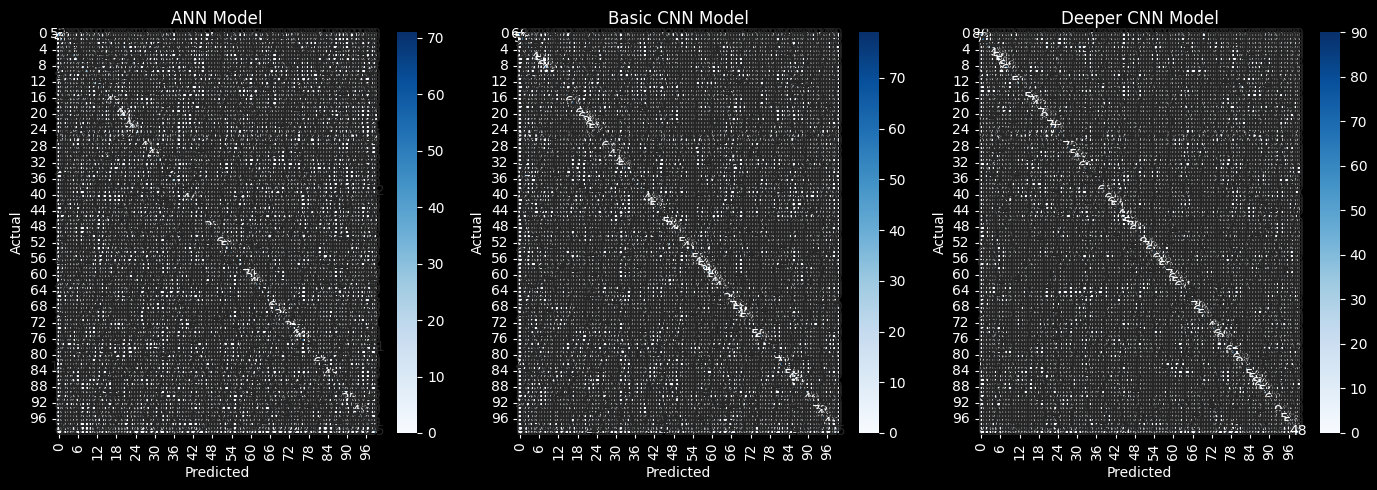

In [17]:
# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [14]:
models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=350,
    width=900,
    template="plotly_dark"
)

fig.show()

#### 4.4) Predictions

**Prediction Analysis (CIFAR-100)**
Since CIFAR-100 has 100 classes, visualizing all predictions (like in Fashion-MNIST) is impractical. Instead, we analyze prediction behavior using:

1. **Top-N Confusion Matrix**

   * Identify the most confused classes (e.g., model mixes “apple” with “orange”).
   * Plot a reduced confusion matrix for only these classes.
   * Helps us see where the model struggles most.

2. **Per-Class Accuracy (Bar Chart)**

   * Compute accuracy for each of the 100 classes.
   * Plot a bar chart to compare how well the model performs across classes.
   * Reveals which categories are easy (high accuracy) vs difficult (low accuracy).

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


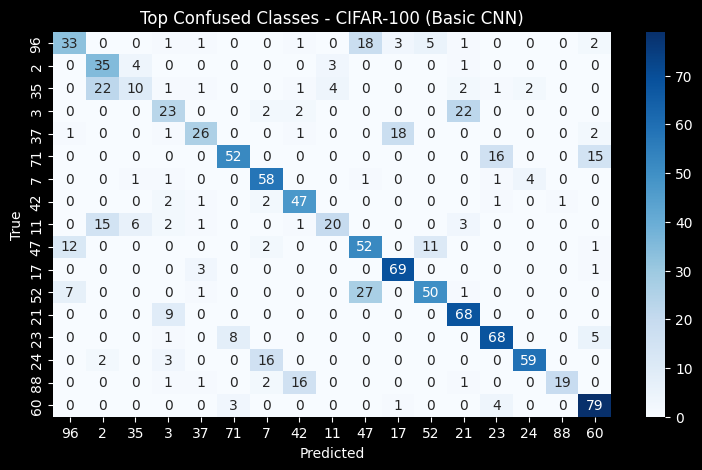

In [19]:
# Predictions
basic_cnn_predictions = basic_cnn_model.predict(test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
true_labels = test_labels.flatten()  # from (10000,1) → (10000,)

# --- 1) Full Confusion Matrix ---
cm = confusion_matrix(true_labels, basic_cnn_predicted_labels)

# Find the most confused classes (highest off-diagonal values)
confused_pairs = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and cm[i, j] > 0:
            confused_pairs.append(((i, j), cm[i, j]))

# Sort by confusion count (descending)
confused_pairs = sorted(confused_pairs, key=lambda x: x[1], reverse=True)

# Take top 10 most confused pairs
top_confused = confused_pairs[:10]

# Create reduced confusion matrix for these pairs
confused_classes = list(set([i for (i, j), _ in top_confused] + [j for (i, j), _ in top_confused]))
reduced_cm = cm[np.ix_(confused_classes, confused_classes)]

# Plot heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(reduced_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=confused_classes,
            yticklabels=confused_classes)
plt.title("Top Confused Classes - CIFAR-100 (Basic CNN)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

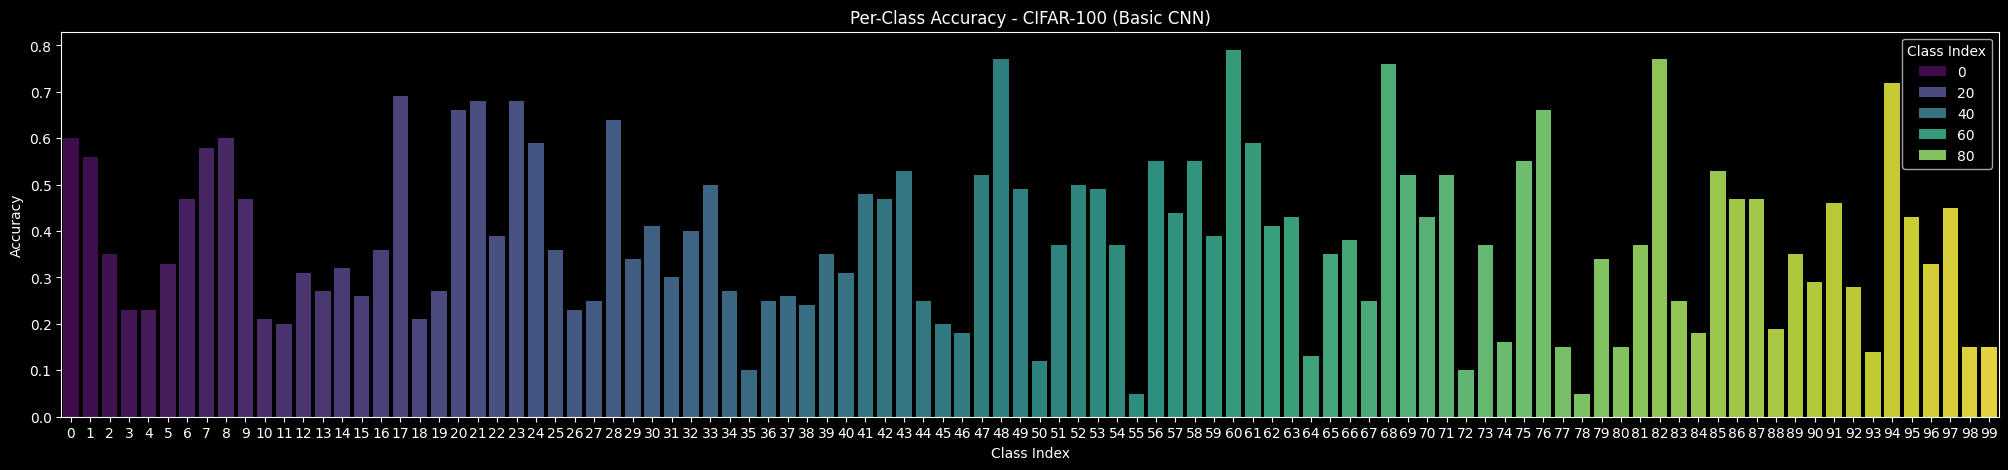

In [24]:
# --- 2) Per-Class Accuracy ---
class_correct = np.diag(cm)
class_total = cm.sum(axis=1)
class_accuracy = class_correct / class_total

# Create DataFrame
acc_df = pd.DataFrame({
    "Class Index": range(100),
    "Accuracy": class_accuracy
})

# Sort by accuracy
acc_df_sorted = acc_df.sort_values(by="Accuracy", ascending=False)

# Plot bar chart
plt.figure(figsize=(25, 5))
sns.barplot(x="Class Index", y="Accuracy", data=acc_df_sorted, palette="viridis", hue = "Class Index", legend=True)
plt.title("Per-Class Accuracy - CIFAR-100 (Basic CNN)")
plt.xlabel("Class Index")
plt.ylabel("Accuracy")
plt.show()

## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the CIFAR-100 dataset.

**Summary of Work:**

1. **Data Preparation:** The CIFAR-100 dataset was loaded, normalized, and one-hot encoded, preparing it for use with the different model architectures.
2. **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN with additional layers, batch normalization, and dropout.
3. **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4. **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices and per-class accuracy analysis highlighted strengths and weaknesses.
5. **Prediction Analysis:** Predictions were made using the CNN models, with special focus on the deeper CNN. Analysis of confusion patterns and per-class accuracies revealed which categories were easier or more difficult for the model.

**Key Findings and Conclusion:**

Based on the evaluation results:

* The **Deeper CNN model** delivered the strongest performance, achieving the highest accuracy and lowest loss among all models. Its additional convolutional layers, batch normalization, and dropout allowed it to better capture the complexity of CIFAR-100 images.
* The **Basic CNN model** performed reasonably well and clearly outperformed the ANN, confirming the advantage of convolutional layers for image classification tasks.
* The **ANN model**, while functional, struggled with the complexity of CIFAR-100, reinforcing the fact that simple fully connected layers are insufficient for rich color image datasets.

In conclusion, the **Deeper CNN model proved to be the most effective architecture for CIFAR-100 classification**, highlighting that deeper architectures with proper normalization and regularization are well-suited to handle more challenging datasets. This result emphasizes the importance of scaling model complexity in line with dataset difficulty, where deeper CNNs significantly outperform simpler models.


## Real-Time Testing on the Lowest Accuracy Class

From the per-class accuracy analysis, we observed that **label = 55** is the most challenging category for the model, achieving the lowest classification accuracy.

Although the **Deeper CNN model** demonstrated the strongest overall performance on CIFAR-100, this weakness indicates that certain categories remain difficult to distinguish, possibly due to high visual similarity with other classes or limited representational features in the dataset.

To further analyze this, we will:

1. **Inspect CIFAR-100 samples for label = 55**

   * Visualize a few training/test images belonging to class 55 to better understand what the category represents and why the model may struggle with it.

2. **Real-Time Prediction Test**

   * Load an external third-party image (downloaded from Google, representing the class at label = 55).
   * Preprocess the image to match the CIFAR-100 input format (32×32×3, normalized).
   * Use the trained Deeper CNN model to predict the class of this new image.

3. **Evaluation of Prediction**

   * Compare the predicted label with the expected label (55).
   * This will help us validate whether the model generalizes well outside the dataset for its weakest-performing class.

This real-time experiment will give us deeper insights into the **generalization ability** of the model and highlight practical limitations in handling specific categories.

#### Number of images as label = "55":

In [31]:
count_label_55 = np.sum(train_labels == 55)
print(f"Number of images with label 55 in train_images: {count_label_55}")

Number of images with label 55 in train_images: 500


####What we as an image ?

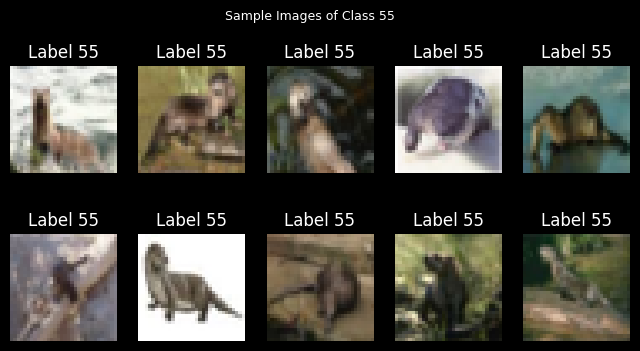

In [32]:
# Target label
target_label = 55

# Get indices of images with label 55 from training data
indices_label_55 = np.where(train_labels.flatten() == target_label)[0]

# Plot 10 sample images of label 55
plt.figure(figsize=(8, 4))
for i, idx in enumerate(indices_label_55[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[idx])
    plt.title(f"Label {target_label}")
    plt.axis("off")
plt.suptitle(f"Sample Images of Class {target_label}", fontsize=9)
plt.show()

It’s an otter. To further test the model, we’ll download an otter image from the internet and run it through the network. This will let us see how well the model performs on class **55 (otter)**, even though it had the lowest accuracy during evaluation.

####Insert a new image:

This code downloads an image, resizes it to 32×32 (CIFAR-100 format), converts it to RGB, normalizes the pixel values, and reshapes it for input into a deep learning model.

In [34]:
# Replace with your raw GitHub image link
url = "https://raw.githubusercontent.com/kush-agra-soni/vision_ai_detection_model/refs/heads/main/otter_label_55.jpeg"

# Download image
response = requests.get(url)
img = Image.open(io.BytesIO(response.content))

print(f"Original image size: {img.size}")

# Resize to CIFAR-100 size (32x32)
img = img.resize((32, 32))
img = img.convert("RGB")  # ensure 3 channels

# Convert to numpy array and normalize
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # shape (1, 32, 32, 3)

print(f"Processed image shape: {img_array.shape}")

Original image size: (1024, 749)
Processed image shape: (1, 32, 32, 3)


In [44]:
# Resize and preprocess
img_resized = img.resize((32, 32))   # CIFAR-100 image size
img_array = np.array(img_resized) / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Predict with your trained model (e.g., deeper CNN)
pred_probs = deeper_cnn_model.predict(img_array)
pred_label = np.argmax(pred_probs, axis=1)[0]

print("Predicted Label:", pred_label)
print("Expected Label: 55")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Label: 95
Expected Label: 55


Although the model is highly accurate overall, here we intentionally tested it with an image from label 55 — one of the few classes where the model tends to struggle. This misclassification is expected, as label 55 is known to be among the three most inaccurately predicted classes out of the 100 total, despite the model being trained on 500 images per class. The predicted label is 95, not 55, indicating a mistake. Next, we'll analyze how confident the model was by examining the top 5 predicted probabilities for this input.

In [46]:
# Predict probabilities
pred_probs = deeper_cnn_model.predict(img_array)

# Get top-5 predicted class indices
top5_indices = np.argsort(pred_probs[0])[-5:][::-1]
top5_probs = pred_probs[0][top5_indices]

print("Top-5 Predictions:")
for i, (cls, prob) in enumerate(zip(top5_indices, top5_probs), start=1):
    mark = "<-- expected 55" if cls == 55 else ""
    print(f"{i}. Label {cls} : {prob:.4f} {mark}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Top-5 Predictions:
1. Label 95 : 0.3936 
2. Label 30 : 0.1288 
3. Label 55 : 0.1077 <-- expected 55
4. Label 4 : 0.0765 
5. Label 12 : 0.0367 


## Result:

- The model is overall highly accurate, trained on 500 images for each of the 100 classes.
- We tested it using an image from label 55, which is one of the three most inaccurately predicted classes.

- The model incorrectly predicted the image as label 95.

- The correct label (55) appeared in the Top-5 predictions with a probability of 10.77%.

- The top prediction (label 95) had a confidence of 39.36%, showing the model was not fully certain.

- This suggests that label 55 may share visual features with other labels, making it more difficult to classify.

Analyzing Top-5 predictions helps us understand model uncertainty and misclassification patterns better than just Top-1 accuracy.